In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False


### 1-Sample T-test(단일 표본 t-검정)

전체 학생들 중 20명의 학생들을 추려 키를 재서 전체 학생들의 평균 키가 
175cm인지 아닌지 알아보고 싶다.<br>

 귀무 가설: 학생들의 평균 키가 175cm이다.<br>
 대립 가설: 학생들의 평균 키가 175cm가 아니다.


In [2]:
np.random.seed(1)
height = 180+ np.random.normal(0, 5, 20 )

In [3]:
height

array([188.12172682, 176.94121793, 177.35914124, 174.63515689,
       184.32703815, 168.49230652, 188.72405882, 176.1939655 ,
       181.59519548, 178.75314812, 187.31053969, 169.69929645,
       178.38791398, 178.07972823, 185.66884721, 174.50054366,
       179.13785896, 175.61070791, 180.21106873, 182.91407607])

In [9]:
# (데이터, 모평균값)
tTestResult = stats.ttest_1samp(height, 175)
print(tTestResult.pvalue)

0.00277711459981648


In [11]:
'''
p-value가 0.003으로, 귀무가설을 기각한다. 학생들의 평균 키는 175cm가 아니라고 할 수 있다.
'''

### Unpaired T-test(독립 표본 t-검정):서로다른두집단
집단 1과 집단 2에서 각각 20명의 학생들을 추려, 각 집단의 키가 같은지, 
다른지 알아보고 싶다.<br>
- 귀무 가설: 두 집단의 평균 키는 같다.
- 대립 가설: 두 집단의 평균 키는 같지 않다.(양측 검정)

독립표본
- 등분산 가정 두집단
- 이분산 가정 두집단
- 등분산여부는 F검정으로 확인

In [12]:
np.random.seed(1)
# 평균이 170이고 편차가 5인 20개 데이터
group1Heights = 170+ np.random.normal(0, 5, 20 )

# 평균이 175이고 편차가 10인 20개 데이터
group2Heights = 175+ np.random.normal(0, 10, 20 )

In [13]:
group1Heights

array([178.12172682, 166.94121793, 167.35914124, 164.63515689,
       174.32703815, 158.49230652, 178.72405882, 166.1939655 ,
       171.59519548, 168.75314812, 177.31053969, 159.69929645,
       168.38791398, 168.07972823, 175.66884721, 164.50054366,
       169.13785896, 165.61070791, 170.21106873, 172.91407607])

In [15]:
# 등분산 가정
r1 = stats.ttest_ind(group1Heights,group2Heights)
print(r1.pvalue) # 두집단 평균키는 같지않다.and

0.025249639899591222


In [17]:
# 이분산 가정
r2 = stats.ttest_ind(group1Heights,group2Heights, equal_var=False)
print(r2.pvalue) # 두집단 평균키는 같지않다.and

0.025992343643634945


### Paired T-test (이분산가정)
Paired T-test(대응 표본 t-검정): 동일한집단의 사전,사후평균비교
다이어트 약을 복용한 사람들 중 20명을 추려 복용 전/후의 체중 차이가 유의미한지 알아보고 싶다. 귀무 가설: 복용 전/후의 체중 차이가 없다. 대립 가설: 복용 전/후의 체중 차이가 있다.

In [19]:
np.random.seed(1)

#before treatment : mean 60, standard deviation 5
beforeWeights = [60 + np.random.normal(0, 5) for _ in range(20)]
#after treatment : mean 0.99-fold decrease, standard deviation 0.02
afterWeights = [w * np.random.normal(0.99, 0.02) for w in beforeWeights]

In [23]:
t2 = stats.ttest_rel(beforeWeights, afterWeights)
print(t2.pvalue) # 0.5보다 작기때문에 표본과 모집단의 평균은 차이가 있다.

0.008871163766572827


## 카이제곱검정

- 카이제곱 분포에 기초한 통계적 방법
- 관찰된 빈도가 기대빈도와 의미있게 다른지의 여부를 검증하기 위해 사용되는 검증방법
- 자료가 빈도로 주어졌을 때, 특히 명목척도 자료의 분석에 이용
- 질적자료와 질적자료간에 서로 통계적으로 관계가 있는지 판단하는 검정
- 단일표본의 모집단이 정규분포를 따르며 분산을 미리 알고 있는 경우에 적용된다.


A : 결혼식을 한다고 할 때 200명쯤 올 것이다. 하는 것은 기대치이고, 결혼식 당일 220명이 왔다. 는 관찰치이다.

B : 집들이를 한다고 할 때 20명이 올 것이다. 하는 것은 기대치이고, 집들이 당일 40명이 왔다. 는 관찰치이다.

 

A 와 B 경우의 기대치-관찰치 차이는 20으로 똑같다. 하지만 정말 같은 차이일까?

제곱한 것에 대해 기대치로 나누어주었다.  <br>
$결혼식:  \dfrac{ (220-200)^2 }{ 200 }=2$ <br>
$집들이: \dfrac{(40-20)^2}{20} =20 $ <br>

이런 경우 "당황되는 정도"는 집들이가 10배 정도 클 것이다.

Chi-square:<br>
이 값이 0 에 가까워지면 기무가설을 지지하고, 0보다 아주 많이 크다면 대립가설을 지지한다.

귀무:당황하지않는다
대립:당황한다

제품의 판매량 비율은 다음과 같습니다. A 56%, B 12%, C 32% 

그런데, 특정 지역에 제품 A, B, C의 보유대수를 조사하니, 각각 324대, 78대, 261대였습니다.

이 자료로 다음과 같이 관찰빈도와 기대빈도를 만들 수 있다.
- 귀무가설 H0는 관찰빈도는 기대빈도와 같다.
- 대립가설 H1은 관찰빈도는 기대빈도와 다르다.

In [ ]:
'''
(관찰값 - 기대값)^2 / 기대값
'''

In [25]:
from pandas import DataFrame

xo, xe = [324, 78, 261], [371, 80, 212]
xc = DataFrame([xo, xe], columns=['Item A', 'Item B', 'Item C'], 
               index=['관찰', '기대'])
xc

,Item A,Item B,Item C
관찰,324,78,261
기대,371,80,212


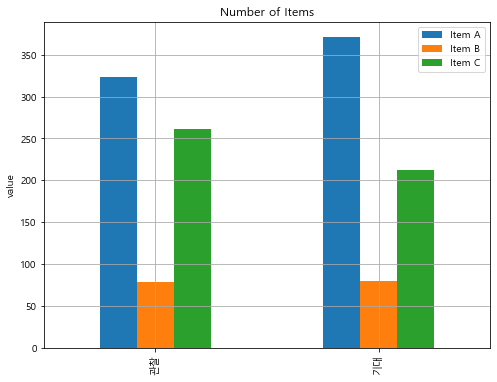

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = xc.plot(kind='bar', title='Number of Items', figsize=(8, 6))
ax.set_ylabel('value')
plt.grid(color='darkgray')
plt.show()


In [28]:
from scipy.stats import chisquare

# 관찰치 , 기대치
result = chisquare(xo, f_exp=xe)
result.pvalue # 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택


0.00017254977751013492

## F검정
등분산여부를 검정

In [31]:
#남녀의 영어 성적에 대한 분산 분석
from scipy.stats import f_oneway

boy = np.array( [46,47,58,47,27,58,56,26,47,25] )
girl= np.array( [78,57,31,28,67,77,36,57,36,57] )

# 영화의 광고 전후에 대한 선호도
bf = np.array([11,14,18,21,26,28,37,45,48,60,64] )
af = np.array([13,15,17,18,19,23,25,28,29,36,37])

print( f_oneway( boy, girl) ) # 분산이 같다 pvalue > 0.05
print( f_oneway( bf, af)) # 분산이 같다 pvalue > 0.05

F_onewayResult(statistic=1.4591624718860445, pvalue=0.24269553293319618)
F_onewayResult(statistic=2.835186691980833, pvalue=0.10776455501678371)
